In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2024-05-10 12:58:16.460935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

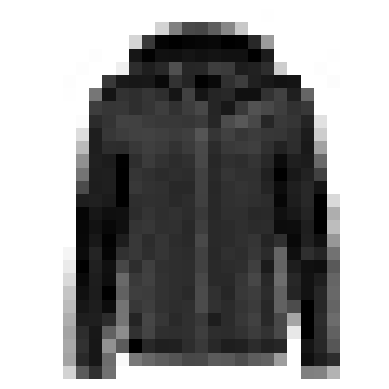

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

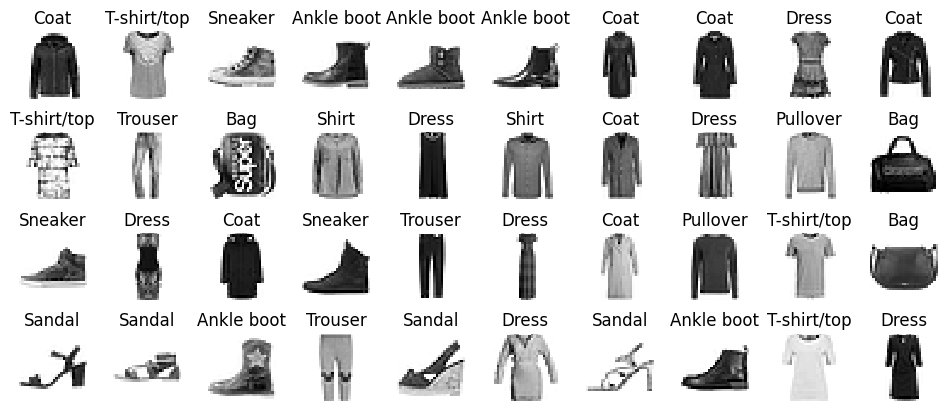

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [13]:
weights

array([[-0.0370418 ,  0.01808856,  0.06912945, ..., -0.00812881,
         0.02819895,  0.04507497],
       [-0.02939209,  0.02614125,  0.06169438, ..., -0.02206928,
        -0.01736513,  0.06985036],
       [ 0.01582924,  0.02196594,  0.03364362, ..., -0.02822692,
        -0.03702174, -0.01834654],
       ...,
       [-0.00378276, -0.00569953, -0.00455245, ..., -0.02538886,
         0.05115865,  0.0584875 ],
       [ 0.02007654, -0.01821411, -0.05766734, ...,  0.0174643 ,
        -0.01620722,  0.04735943],
       [-0.04577848, -0.02826089,  0.0618567 , ...,  0.07024844,
        -0.05117697,  0.01059626]], dtype=float32)

In [14]:
print(weights.shape)

(784, 300)


In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7308 - accuracy: 0.7597 - val_loss: 0.5259 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4867 - accuracy: 0.8299 - val_loss: 0.4358 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4414 - accuracy: 0.8440 - val_loss: 0.5215 - val_accuracy: 0.8050
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4147 - accuracy: 0.8562 - val_loss: 0.3936 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3962 - accuracy: 0.8613 - val_loss: 0.3758 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3774 - accuracy: 0.8668 - val_loss: 0.3714 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8719 - val_loss: 0.3674 - val_accuracy:

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [19]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

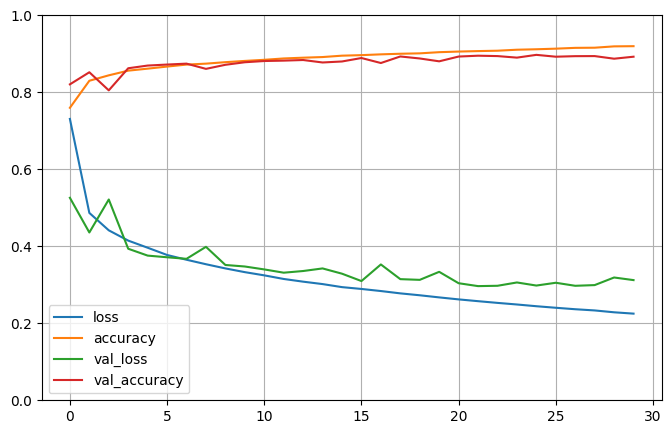

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8797


[0.34361374378204346, 0.8797000050544739]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

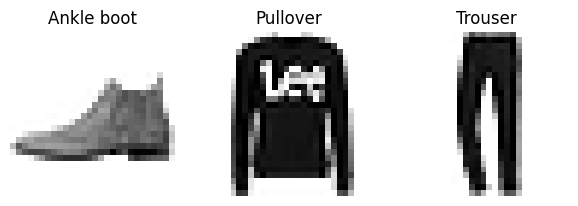

In [27]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


2024-06-05 18:02:48.938744: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 18:02:49.041306: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 18:02:49.301058: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 18:02:50.541321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/home/konrad/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7001 - loss: 0.9323 - val_accuracy: 0.8260 - val_loss: 0.5028
Epoch 2/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8332 - loss: 0.4675 - val_accuracy: 0.8468 - val_loss: 0.4360
Epoch 3/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8510 - loss: 0.4145 - val_accuracy: 0.8586 - val_loss: 0.4025
Epoch 4/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8615 - loss: 0.3841 - val_accuracy: 0.8654 - val_loss: 0.3796
Epoch 5/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8685 - loss: 0.3631 - val_accuracy: 0.8692 - val_loss: 0.3653
Epoch 6/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8744 - loss: 0.3470 - val_accuracy: 0.8722 - val_loss: 0.3523
Epoch 7/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8789 - loss: 0.3337 - val_accuracy: 0.8740 - val_loss: 0.3450
Epoch 8/30
3438/3438 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8833 - loss: 0.3222 - 

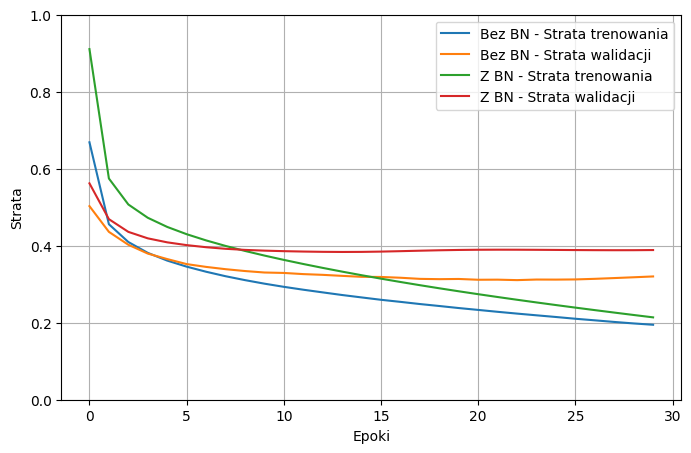

Model bez BN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8731 - loss: 0.3588
Model z BN:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.4270
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predykcje: ['Ankle boot' 'Pullover' 'Trouser']


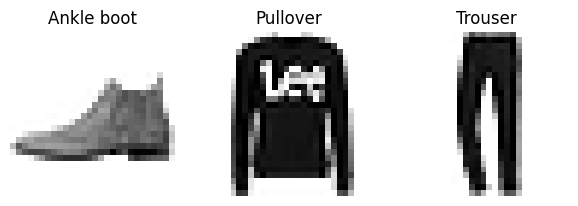

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Podział na zbiory treningowe, walidacyjne i testowe
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Zdefiniowanie nazw klas
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Zbudowanie modelu bez BatchNormalization
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=16
)

# Zbudowanie modelu z BatchNormalization
model_bn = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(64, use_bias=False),
        keras.layers.BatchNormalization(),
        keras.layers.Activation("sigmoid"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model_bn.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

history_bn = model_bn.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=16
)

# Porównanie krzywych uczenia
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Bez BN - Strata trenowania")
plt.plot(history.history["val_loss"], label="Bez BN - Strata walidacji")
plt.plot(history_bn.history["loss"], label="Z BN - Strata trenowania")
plt.plot(history_bn.history["val_loss"], label="Z BN - Strata walidacji")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend()
plt.show()

# Ocena modelu na zbiorze testowym
print("Model bez BN:")
model.evaluate(X_test, y_test)

print("Model z BN:")
model_bn.evaluate(X_test, y_test)

# Przewidywanie nowych danych
X_new = X_test[:3]
y_proba = model_bn.predict(X_new)
y_proba.round(2)

y_pred = np.argmax(model_bn.predict(X_new), axis=-1)
print("Predykcje:", np.array(class_names)[y_pred])

# Wizualizacja nowych danych
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()